# 이미지 패딩

In [5]:
from PIL import Image 

In [6]:
def re_ratio_image(im, ratio = 1):    
    w, h = im.width, im.height
    fixedW, fixedH = w, h
    if w/h >= ratio:
        fixedH = w / ratio
    else:
        fixedW = h * ratio
    fixedW, fixedH = int(fixedW), int(fixedH)
    
    newIm = Image.new("RGB", (fixedW, fixedH))
    newIm.paste(im, ((fixedW - w)//2, (fixedH - h)//2))
    
    return newIm

In [25]:
import os

# ROOT_PATH = "C:\JupyterNotebook\GitHub\petfinder\EfficientDet"
ROOT_PATH = "C:/github/petfinder/EfficientDet/"
TRAIN_FOLDER = "dataset/train/"
os.chdir(ROOT_PATH)
train_img_names = os.listdir(TRAIN_FOLDER)

In [27]:
import tqdm

TRAIN_FOLDER = "dataset/train/"
for img_name in tqdm.tqdm(train_img_names):
    img = Image.open(TRAIN_FOLDER + img_name)
    new_img = re_ratio_image(img)
    new_img.save("dataset/padding_train/"+img_name)

100%|██████████| 9912/9912 [04:55<00:00, 33.50it/s]


# 이미지 패딩 전 / 후 비교

In [28]:
raw_path = "dataset/train/"
padding_path = "dataset/padding_train/"

In [29]:
for img in train_img_names:
    raw_img = Image.open(raw_path+img)
    resize_img = Image.open(padding_path+img)
    break

(405, 720)


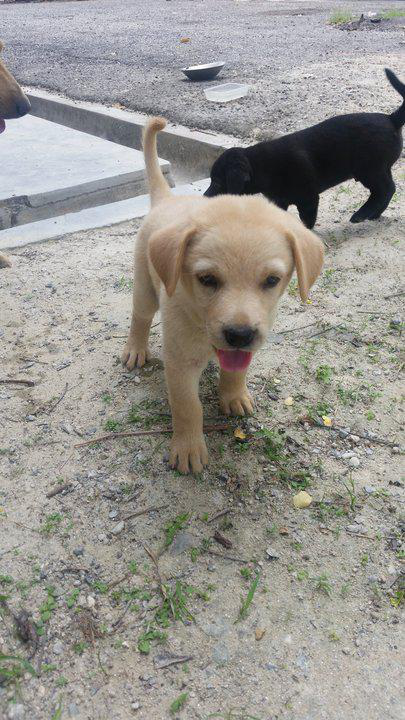

In [33]:
print(raw_img.size)
raw_img

(720, 720)


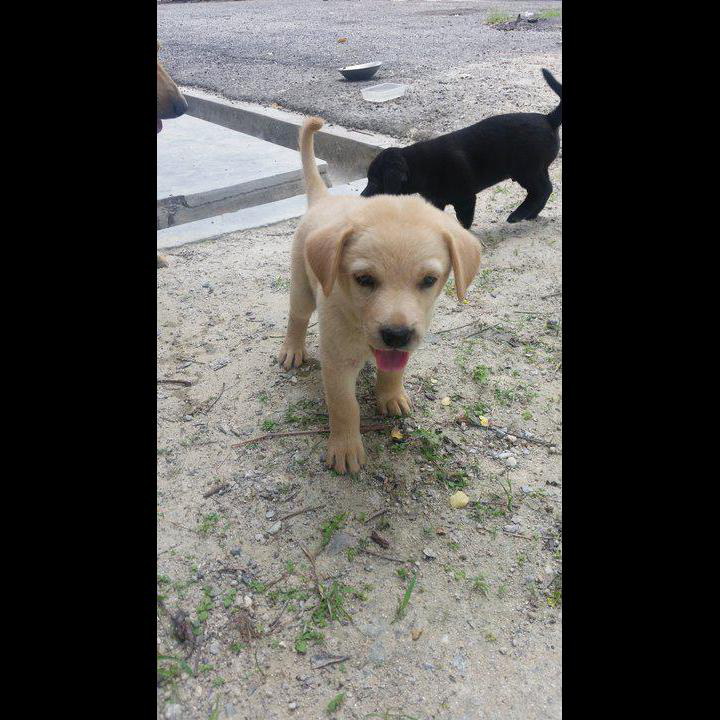

In [34]:
print(resize_img.size)
resize_img

# 이미지 리사이즈

In [36]:
from PIL import Image
import os.path
import tqdm
import os


TRAIN_FOLDER = "dataset/padding_train/"

train_img_names = os.listdir(TRAIN_FOLDER)

for img_name in tqdm.tqdm(train_img_names):
        
    image = Image.open(TRAIN_FOLDER + img_name)
    # print(image.size)

    image=image.resize((512, 512))
    image.save("dataset/padding_resize_train/"+img_name)
    # print(image.size)    

100%|██████████| 9912/9912 [04:24<00:00, 37.41it/s]


In [37]:
for img_name in tqdm.tqdm(train_img_names):        
    raw_img = Image.open("dataset/train/" + img_name)
    padded_img=Image.open("dataset/padding_resize_train/"+img_name)
    
    break

  0%|          | 0/9912 [00:00<?, ?it/s]


(405, 720)


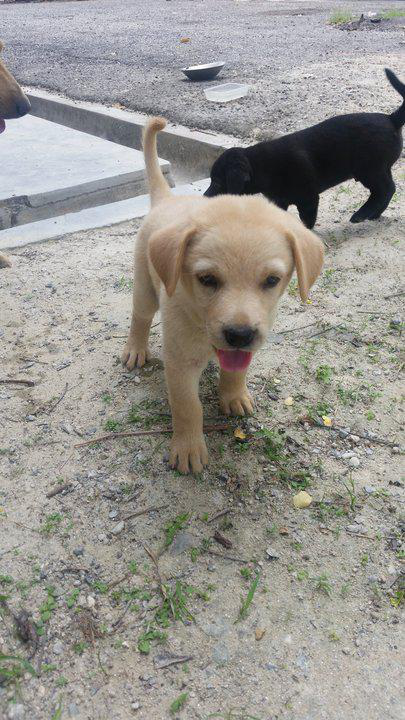

In [38]:
print(raw_img.size)
raw_img

(512, 512)


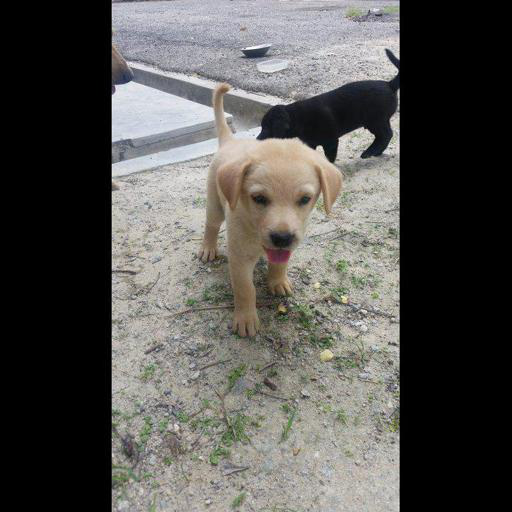

In [39]:
print(padded_img.size)
padded_img

# 바운딩 박스 그리기

In [40]:

import cv2
def plot_one_box(img, coord, label=None, score=None, color=None, line_thickness=None):
    tl = line_thickness or int(round(0.001 * max(img.shape[0:2])))  # line thickness
    color = color
    c1, c2 = (int(coord[0]), int(coord[1])), (int(coord[2]), int(coord[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl)
    if label:
        tf = max(tl - 2, 1)  # font thickness
        s_size = cv2.getTextSize(str('{:.0%}'.format(score)), 0, fontScale=float(tl) / 3, thickness=tf)[0]
        t_size = cv2.getTextSize(label, 0, fontScale=float(tl) / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0] + s_size[0] + 15, c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1)  # filled
        cv2.putText(img, '{}: {:.0%}'.format(label, score), (c1[0], c1[1] - 2), 0, float(tl) / 3, [0, 0, 0],
                    thickness=tf, lineType=cv2.FONT_HERSHEY_SIMPLEX)

In [105]:
import pandas as pd
classes_df = pd.read_csv("classes_backup.csv",header=None).T

In [106]:
classes_df = classes_df.applymap(lambda x : x.replace("[","").replace("]","").replace("'",""))
classes_df.head()

,0
0,
1,
2,
3,
4,cat


In [107]:
print(classes_df.iloc[1,:][0])
print(type(classes_df.iloc[1,:][0]))


<class 'str'>


In [108]:
import numpy as np

classes_df= classes_df.applymap(lambda x : np.nan if len(x) < 1 else x)

In [111]:
classes_df.isnull().sum() / classes_df.shape[0]

0    0.854578
dtype: float64

In [110]:
classes_df.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,cat
